# 실습 1: MNIST 첫 신경망

**목표**: Dense(완전연결) 신경망으로 MNIST 97% 달성

---

**GPU 설정**: 런타임 → 런타임 유형 변경 → T4 GPU 선택

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow 버전: {tf.__version__}")
print(f"GPU 사용 가능: {tf.config.list_physical_devices('GPU')}")

TensorFlow 버전: 2.19.0
GPU 사용 가능: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Step 1: 데이터 준비

In [2]:
# MNIST 데이터 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")
print(f"픽셀 값 범위: {X_train.min()} ~ {X_train.max()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
학습 데이터: (60000, 28, 28)
테스트 데이터: (10000, 28, 28)
픽셀 값 범위: 0 ~ 255


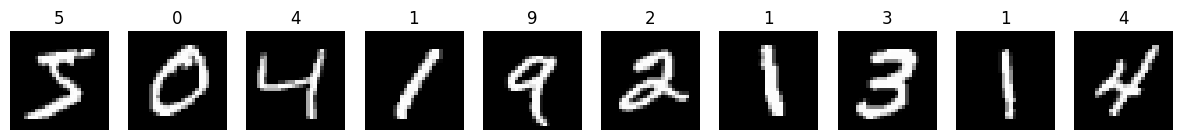

In [3]:
# 샘플 이미지 확인
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'{y_train[i]}')
    ax.axis('off')
plt.show()

In [4]:
# 데이터 전처리
# 1) 28x28 → 784로 펼치기 (Flatten)
# 2) 0~255 → 0~1로 정규화

X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

print(f"전처리 후 shape: {X_train.shape}")
print(f"픽셀 값 범위: {X_train.min():.2f} ~ {X_train.max():.2f}")

전처리 후 shape: (60000, 784)
픽셀 값 범위: 0.00 ~ 1.00


## Step 2: 모델 만들기

In [5]:
# Dense 신경망 모델
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),  # 은닉층 1
    layers.Dense(64, activation='relu'),                        # 은닉층 2
    layers.Dense(10, activation='softmax')                      # 출력층 (0~9)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("모델 컴파일 완료!")

모델 컴파일 완료!


## Step 3: 학습

In [7]:
# 학습 실행
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8706 - loss: 0.4417 - val_accuracy: 0.9698 - val_loss: 0.1142
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1160 - val_accuracy: 0.9693 - val_loss: 0.1017
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0749 - val_accuracy: 0.9757 - val_loss: 0.0860
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0567 - val_accuracy: 0.9753 - val_loss: 0.0925
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9874 - loss: 0.0415 - val_accuracy: 0.9762 - val_loss: 0.0831
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0336 - val_accuracy: 0.9802 - val_loss: 0.0759
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9795 - val_loss: 0.0802
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9917 - loss: 0.0236 - 

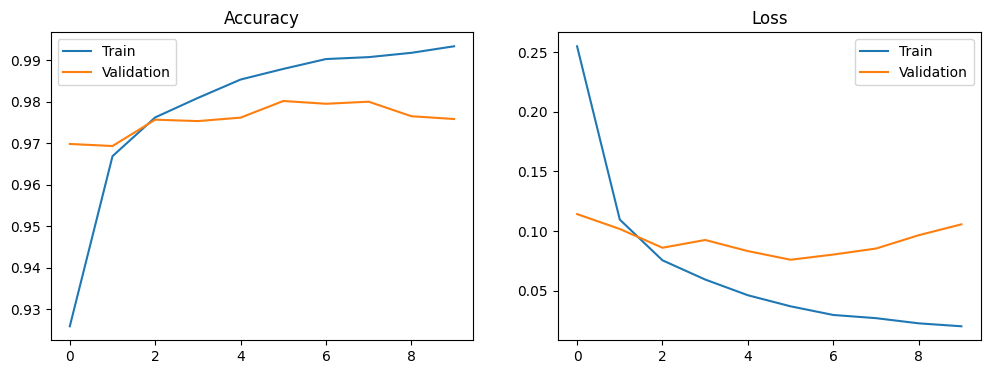

In [8]:
# 학습 과정 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Validation')
axes[0].set_title('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Validation')
axes[1].set_title('Loss')
axes[1].legend()

plt.show()

## Step 4: 평가

In [9]:
# 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n테스트 정확도: {test_acc:.2%}")


테스트 정확도: 97.46%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

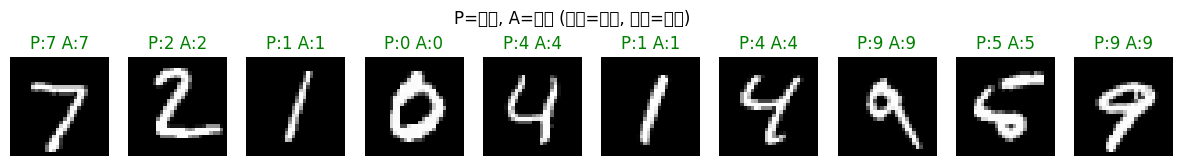

In [10]:
# 예측 결과 시각화
predictions = model.predict(X_test[:10])

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred = np.argmax(predictions[i])
    color = 'green' if pred == y_test[i] else 'red'
    ax.set_title(f'P:{pred} A:{y_test[i]}', color=color)
    ax.axis('off')
plt.suptitle('P=예측, A=정답 (초록=정답, 빨강=오답)')
plt.show()


예측 결과: 5
확신도: 65.4%


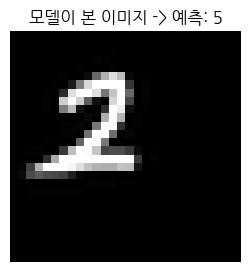


예측 결과: 5
확신도: 99.2%


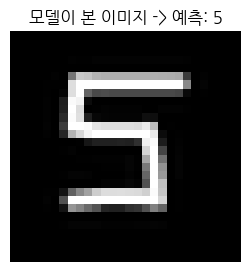


예측 결과: 6
확신도: 99.2%


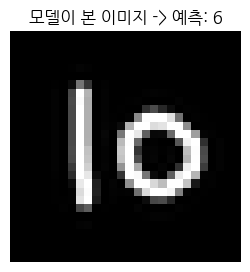


예측 결과: 4
확신도: 99.9%


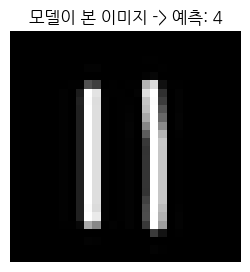


예측 결과: 2
확신도: 50.1%


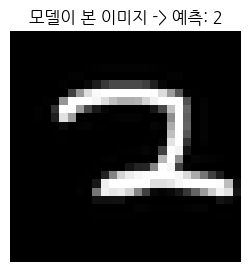


예측 결과: 8
확신도: 71.9%


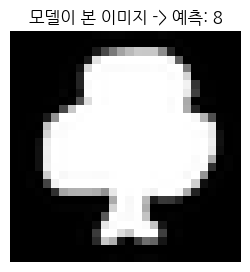

In [26]:
import base64
from io import BytesIO
from PIL import Image
from google.colab import output
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

canvas_html = """
<style>
  #canvas-container { text-align: center; margin: 20px; }
  #draw-canvas { border: 2px solid #333; cursor: crosshair; background: black; }
  button { margin: 5px; padding: 10px 20px; font-size: 16px; }
</style>
<div id=\"canvas-container\">
  <h3>마우스로 숫자를 그려보세요! (0~9)</h3>
  <canvas id=\"draw-canvas\" width=\"280\" height=\"280\"></canvas><br>
  <button onclick=\"clearCanvas()\">지우기</button>
  <button onclick=\"predict()\">예측하기</button>
</div>
<script>
  var canvas = document.getElementById('draw-canvas');
  var ctx = canvas.getContext('2d');
  var drawing = false;
  ctx.fillStyle = 'black';
  ctx.fillRect(0, 0, 280, 280);
  ctx.strokeStyle = 'white';
  ctx.lineWidth = 20;
  ctx.lineCap = 'round';
  canvas.onmousedown = function(e) { drawing = true; ctx.beginPath(); ctx.moveTo(e.offsetX, e.offsetY); };
  canvas.onmousemove = function(e) { if(drawing) { ctx.lineTo(e.offsetX, e.offsetY); ctx.stroke(); } };
  canvas.onmouseup = function() { drawing = false; };
  canvas.onmouseout = function() { drawing = false; };
  function clearCanvas() { ctx.fillStyle = 'black'; ctx.fillRect(0, 0, 280, 280); }
  function predict() { google.colab.kernel.invokeFunction('notebook.predict_digit', [canvas.toDataURL('image/png')], {}); }
</script>
"""

def predict_digit(data_url):
    img_data = base64.b64decode(data_url.split(',')[1])
    img = Image.open(BytesIO(img_data)).convert('L')
    img = img.resize((28, 28), Image.Resampling.LANCZOS)

    # Normalize the image data to 0-1, similar to how X_train was preprocessed
    img_array = np.array(img).reshape(1, -1).astype('float32') / 255.0

    predictions = model.predict(img_array, verbose=0) # Get probability distribution
    predicted_class = np.argmax(predictions[0]) # Get the class with the highest probability
    confidence = predictions[0][predicted_class] * 100 # Get the confidence for the predicted class

    print(f"\n{'='*35}")
    print(f"예측 결과: {predicted_class}")
    print(f"확신도: {confidence:.1f}%")
    print(f"{'='*35}")

    plt.figure(figsize=(3, 3))
    # Reshape img_array for displaying, it's already 0-1
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f'모델이 본 이미지 -> 예측: {predicted_class}')
    plt.axis('off')
    plt.show()

output.register_callback('notebook.predict_digit', predict_digit)
display(HTML(canvas_html))

In [16]:
!apt-get install -y fonts-nanum > /dev/null 2>&1

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정 완료!")

한글 폰트 설정 완료!
